# Project: Investigating tmbd movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This data set contains information movies collected from The Movie Database (TMDb), including user ratings and revenue etc.
<ul>
<li>We will analyse Movie genres and its relation with other variables
<li>Most frequent actors and thier vote averages
<li>Which movies with the highest and the lowest profit?
<li>Which movies with the longest and shortest runtime?
<li>Which movies with the highest and lowest vote average?
<li>Analyse movies profits by release dates
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
 ## Data Wrangling
 
  ### General Properties
<ul>
<li>Dealing with unnecessary columns
<li>Dealing with missing values
<li>Dealing with data types and data formating
</ul>

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Dealing with unnecessary columns

In [4]:
#Drop id, imdb_id, homepage, vote_average, release_year
columns = ['id', 'imdb_id', 'homepage', 'budget_adj', 'revenue_adj', 'overview', 'tagline']
df.drop(columns, axis = 1, inplace = True)

#### Dealing with missing values

In [5]:
#check if there is any missing vslue
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

#### Dealing with data types and data formating

In [8]:
#Let's check the data types
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [9]:
#Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [10]:
#creating the profit column
df['profit'] = df['revenue'] - df['budget']

<a id='eda'></a>
## Exploratory Data Analysis

 ### Which genre has the highest frequency for all years?

In [11]:
#split genres into a list of strings
df['genres'] = df['genres'].str.split('|')
df['genres'][5]

['Western', 'Drama', 'Adventure', 'Thriller']

In [12]:
#Explode genres by release date and director columns
df_gen = df[['release_year', 'genres', 'director', 'profit']].explode(column='genres', ignore_index=True)
df_gen.head()

,release_year,genres,director,profit
0,2015,Action,Colin Trevorrow,1363528810
1,2015,Adventure,Colin Trevorrow,1363528810
2,2015,Science Fiction,Colin Trevorrow,1363528810
3,2015,Thriller,Colin Trevorrow,1363528810
4,2015,Action,George Miller,228436354


In [13]:
#making a pivot table 
df_gen_exploded = pd.pivot_table(data=df_gen, index='release_year',
                                 columns=['genres'], values=['director'], aggfunc='count', fill_value=0)
df_gen_exploded.head()

director                                                     \
genres         Action Adventure Animation Comedy Crime Documentary Drama   
release_year                                                               
1960                7         5         0      7     2           0    12   
1961                7         6         1      8     2           0    16   
1962                6         7         0      5     3           0    19   
1963                4         7         1     13     4           0    13   
1964                5         5         2     16    10           0    20   

                                                                          \
genres       Family Fantasy Foreign History Horror Music Mystery Romance   
release_year                                                               
1960              3       2       0       4      7     1       0       5   
1961              3       1       1       3      3     2       1       6   
1962              2       1       1       3      5     1       4       5   
1963              3       2       2       4      8     0       5       8   
1964              4       3       1       3      6     5       4       9   

                                                            
genres       Science Fiction TV Movie Thriller War Western  
release_year                                                
1960                       3        0        6   1       6  
1961                       2        0        0   2       3  
1962                       2        0        7   2       3  
1963                       2        0       10   1       2  
1964                       4        0        9   3       1

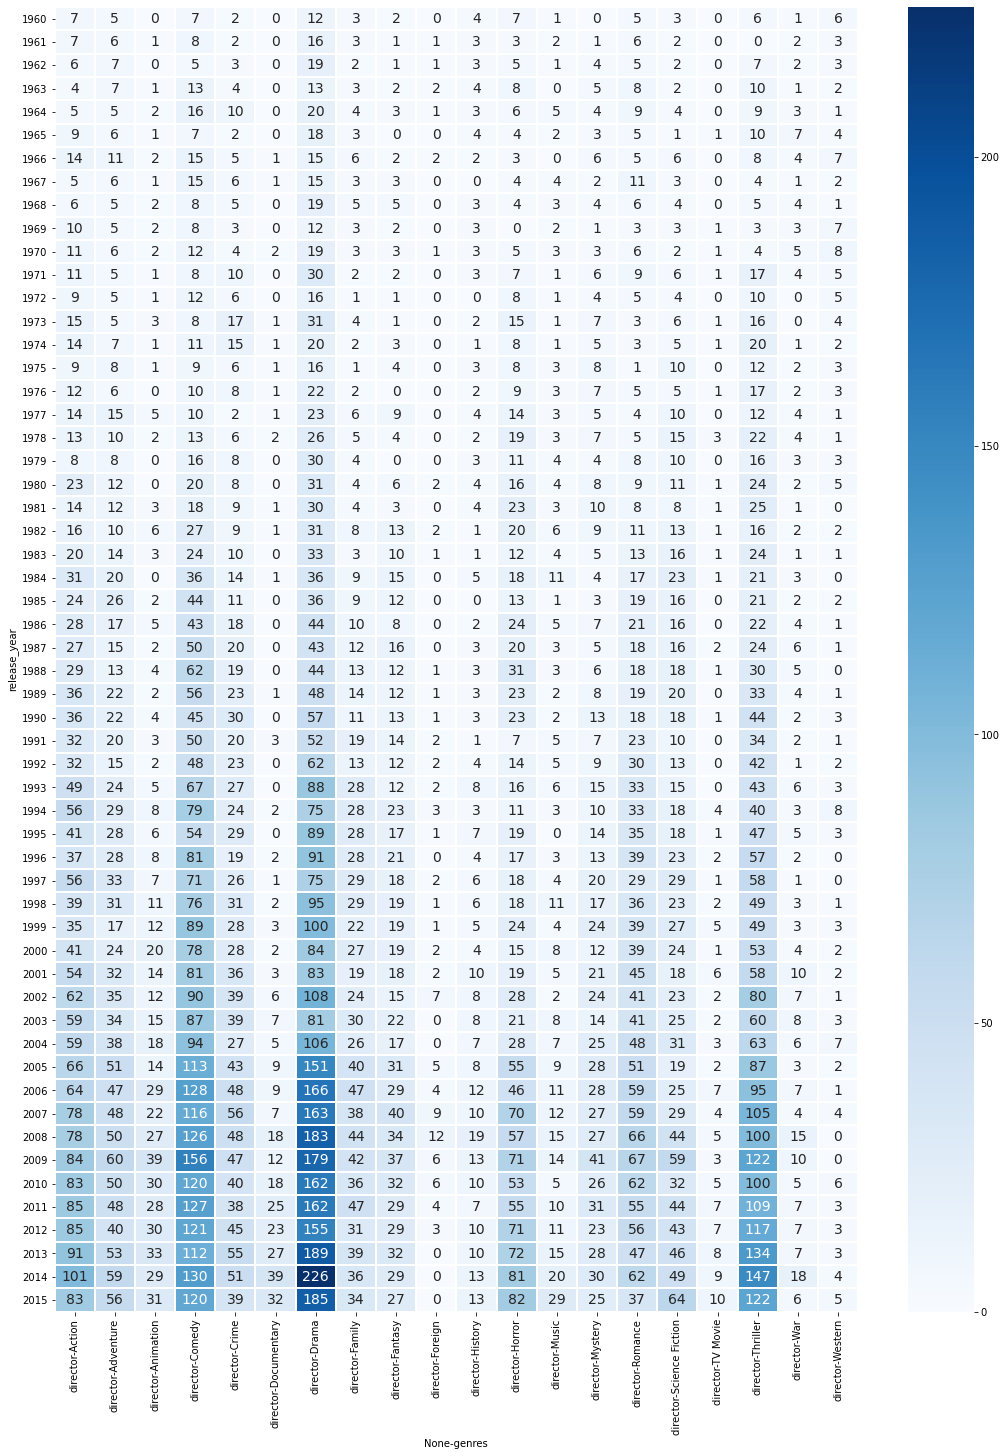

In [14]:
#creating a heatmap to describe our data
plt.figure(figsize=(18, 24))
g = sns.heatmap(data=df_gen_exploded, cmap='Blues', linewidth=1, annot=True, fmt='.0f', annot_kws={'fontsize': 14})

Drama genre has the highest release frequency for all years

### Wich genre has the highest release of movies?

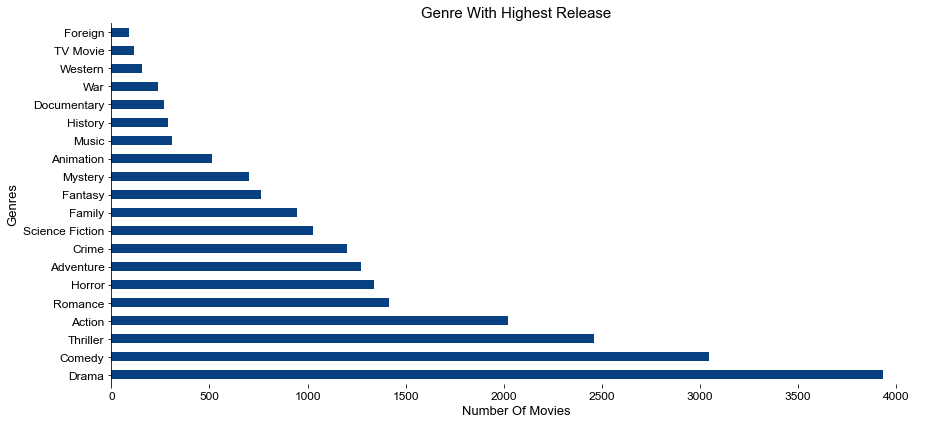

In [15]:
#extracting each genre and calculating its value counts
total_genres = df_gen['genres'].explode('genres').value_counts()
total_genres.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='GnBu_r')

#editing plot labels and title
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("ticks")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

So as we can see Drama genre has the highest frequency followed by comedy and thriller

 ### What are the highest profit movie genres?

In [16]:
#sorting and grouping by profit 
df_gen_profit = df_gen.groupby(['genres'])['profit'].sum()
df_gen_profit = df_gen_profit.sort_values(ascending = False)
df_gen_profit.head()

genres
Adventure    110841722597
Action       107557697292
Comedy        91109968697
Drama         82533384986
Thriller      70901603971
Name: profit, dtype: int64

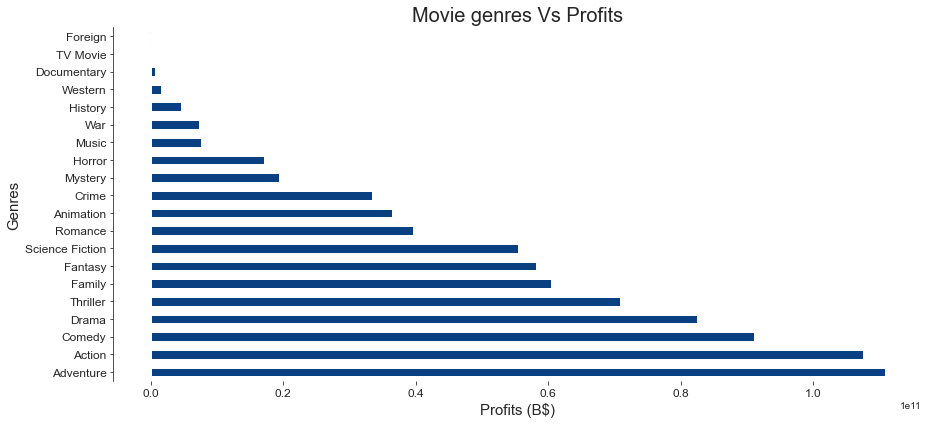

In [17]:
#creating a lineplot
plt.figure(figsize=(16, 10))
p = df_gen_profit.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='GnBu_r')
plt.title('Movie genres Vs Profits',size=20)
plt.xlabel('Profits (B$)', size=15)
plt.ylabel('Genres', size=15)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

So Adventure genre is the highest profit of all

### Which movies with the highest and the lowest profit?

In [18]:
#creating a function to get maximum and minimum value in a column
def minmax(column):
    #column of the index of max and min value
    max_value = pd.DataFrame(df.loc[df[column].idxmax])
    min_value = pd.DataFrame(df.loc[df[column].idxmin])
    #concate the two column together
    data = pd.concat([max_value, min_value], axis = 1)
    return data

In [19]:
minmax('profit')

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Adventure, Fantasy, Action, Western, Thriller]"
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


As we can see the ***'Avatar'*** Movie has the higest profit by 2544505847 dollar and ***'The Warrior's Way'*** is the lowest losing 413912431 dollar

### What are the movies with the longest and shortest runtime?

#### First lets delete the zeros values from the runtime column to avoid 0 runtime values

In [20]:
df['runtime'] = df['runtime'].replace(0, np.nan)
df['runtime'].dropna(inplace = True)

In [21]:
#using our function to get the longest and the shortest runtime of movies
minmax('runtime')

,2722,1112
popularity,0.537593,0.202776
budget,0,0
revenue,125000000,0
original_title,Band of Brothers,Batman: Strange Days
cast,Damian Lewis|Ron Livingston|Frank John Hughes|...,Kevin Conroy|Brian George|Tara Strong
director,Phil Alden Robinson|Richard Loncraine|Mikael S...,Bruce Timm
keywords,world war ii|us army|war|paratroops|combat,dc comics|superhero|based on comic book|noir|p...
runtime,705.0,3.0
genres,"[Action, Drama, War]","[Action, Animation]"
production_companies,HBO,DC Comics


So as we can see the longest runtime movie is ***'Band of Brothers'*** and the shortest is ***'Batman: Strange Days'***

### Which movies has the highest and the lowest vote average?

In [22]:
##using our function to get the highest and the lowest rate of movies
minmax('vote_average')

,6911,7772
popularity,0.21201,0.12112
budget,0,0
revenue,0,0
original_title,Pink Floyd: Pulse,Transmorphers
cast,David Gilmour|Nick Mason|Richard Wright|Sam Br...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,David Mallet,Leigh Scott
keywords,live concert,futuristic
runtime,145.0,86.0
genres,[Music],"[Action, Adventure, Science Fiction]"
production_companies,SMV Enterprises|Columbia Music Video|EMI,"Asylum, The"


So the highest vote average here goes to ***'Pink Floyd: Pulse'*** and the lowest to ***'Transmorphers'***

### Who are the most frequent actors?

In [23]:
#split genres into a list of strings
df['cast'] = df['cast'].str.split('|')
df['cast'][5]

['Leonardo DiCaprio',
 'Tom Hardy',
 'Will Poulter',
 'Domhnall Gleeson',
 'Paul Anderson']

Text(0, 0.5, 'Number Of Movies')

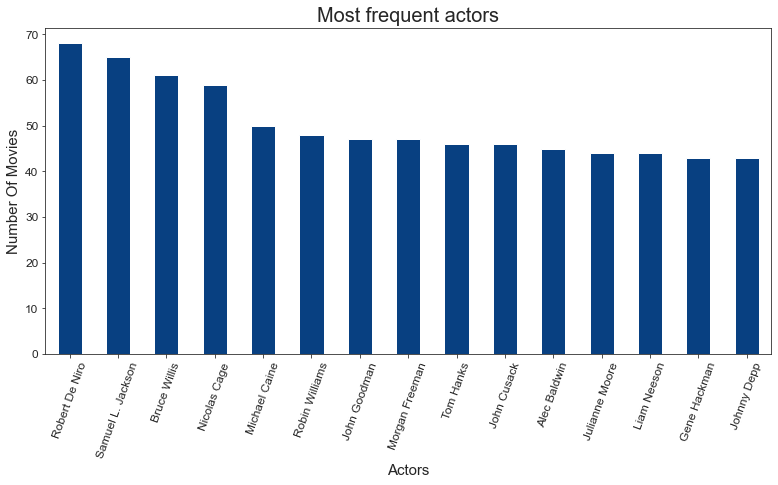

In [24]:
#counting the number of movies done by each actor in the cast column
df_cast_count = df['cast'].explode('cast').value_counts()
#creating a bar plot
plt.figure(figsize=(16, 10))
p = df_cast_count.iloc[:15].plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='GnBu_r')
plt.title('Most frequent actors',size=20)
plt.xticks(rotation = 70)
plt.xlabel('Actors', size=15)
plt.ylabel('Number Of Movies', size=15)

Robert De Niro is the most frequent actor in our dataset

### Movies profit by dates

#### Months vs Profits

In [25]:
#Extracting month from release date column
df['month'] = df['release_date'].dt.month_name()

In [26]:
#groupby month and sorting the profit values
df_M = df.groupby(df['month'])['profit'].sum().sort_values()
df_M

month
January       6855390876
February     10627155845
September    13465619027
August       14356556697
April        15885471649
October      16300150008
March        19194395454
July         29518226018
November     30493854871
May          34346594407
December     38440122065
June         43806655927
Name: profit, dtype: int64

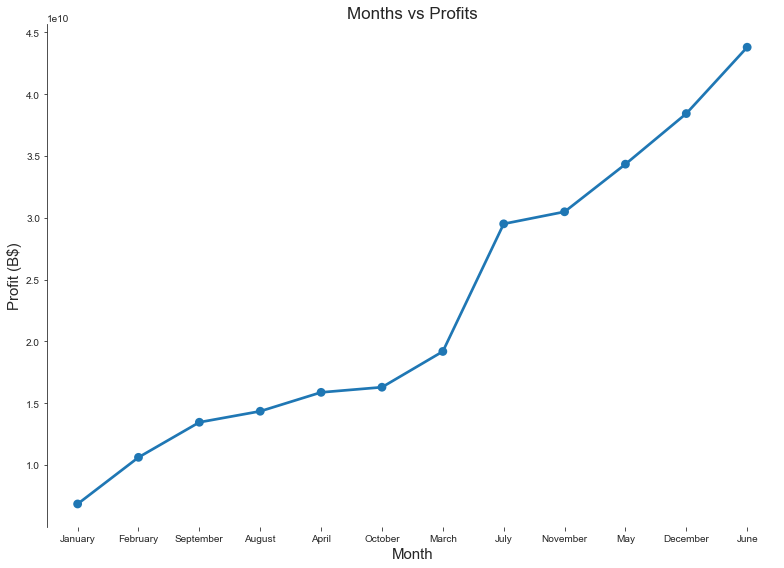

In [27]:
#Creating a point plot
plt.figure(figsize=(11, 8))
p = sns.pointplot(x=df_M.index,y=df_M)
p.set_title("Months vs Profits",fontsize = 17)
p.set_xlabel("Month",fontsize = 15)
p.set_ylabel("Profit (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

As we can see June and Decembre has the highest profits on released movies

#### Years vs Profits

In [28]:
#groupby month and sorting the profit values
df_Y = df.groupby(df['release_year'])['profit'].sum().sort_values()

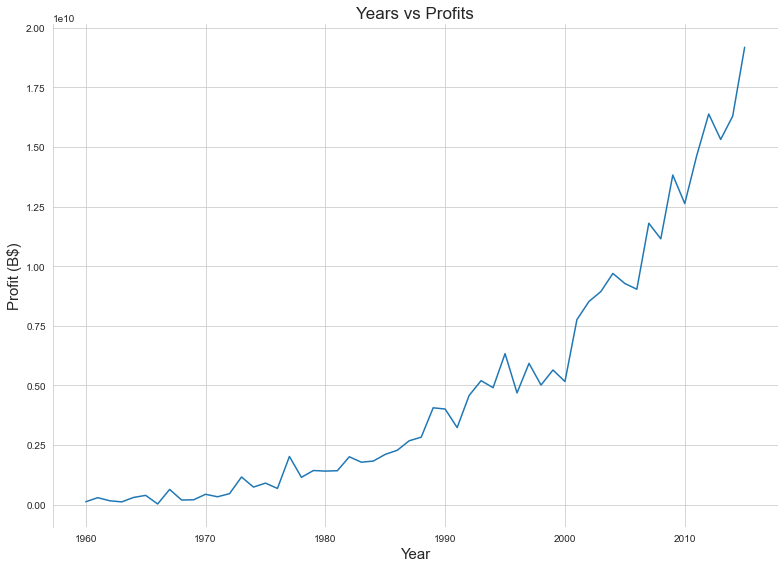

In [29]:
#creating a line plot
plt.figure(figsize=(11, 8))
sns.lineplot(x=df_Y.index,y=df_Y)
plt.title("Years vs Profits",fontsize = 17)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Profit (B$)",fontsize = 15)
sns.set_style("whitegrid")
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

Movies profits are increasing by years

<a id='conclusions'></a>
## Conclusions



> <ul>
 <li>Documantry is the most high rated genre
 <li>Adventure genre has the highest profits
 <li>Robert De Niro is the most frequent actor
 <li>'Avatar' Movie has the higest profit
 <li>the longest runtime movie is "Band of Brothers"
 <li>'Pink Floyd: Pulse' has the highest vote average
 <li>June and Decembre has the highest profits on released movies 
 <li>Movies profits are increasing by years
 </ul>

> **Limitations**:
This data is not 100% accurate because in data cleaning we droped all the null values wich they are about 2500 row